In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Data/2024-property-assessment-data.csv")
df.head()

C:\Users\Ian\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIP_CODE,BLDG_SEQ,NUM_BLDGS,...,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_SYSTEM,AC_TYPE,FIREPLACES,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
0,100001000,NaN,100001000,104.0,PUTNAM ST,NaN,EAST BOSTON,2128.0,1,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.0,NaN,3.0,A - Average,NaN
1,100002000,NaN,100002000,197.0,Lexington ST,NaN,EAST BOSTON,2128.0,1,1,...,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,0.0,NaN,0.0,A - Average,NaN
2,100003000,NaN,100003000,199.0,Lexington ST,NaN,EAST BOSTON,2128.0,1,1,...,S - Semi-Modern,S - Semi-Modern,S - Space Heat,NaN,N - None,0.0,NaN,0.0,A - Average,NaN
3,100004000,NaN,100004000,201.0,Lexington ST,NaN,EAST BOSTON,2128.0,1,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.0,NaN,0.0,A - Average,NaN
4,100005000,NaN,100005000,203.0,Lexington ST,NaN,EAST BOSTON,2128.0,1,1,...,N - No Remodeling,NaN,W - Ht Water/Steam,NaN,N - None,0.0,NaN,0.0,A - Average,NaN


**Data Cleaning**

In [5]:
print("Zip Code Null Values %: ", df['ZIP_CODE'].isna().sum()/len(df))
print("Year Built Null Values %: ", df['YR_BUILT'].isna().sum()/len(df))

Zip Code Null Values %:  1.64616279452596e-05
Year Built Null Values %:  0.12503155145356173


In [6]:
np.sort(df["YR_BUILT"].unique())

array([ 1700.,  1710.,  1725.,  1752.,  1760.,  1775.,  1779.,  1780.,
        1785.,  1789.,  1790.,  1791.,  1792.,  1798.,  1799.,  1800.,
        1802.,  1803.,  1804.,  1805.,  1806.,  1807.,  1808.,  1809.,
        1810.,  1811.,  1812.,  1814.,  1816.,  1818.,  1819.,  1820.,
        1821.,  1822.,  1823.,  1824.,  1825.,  1826.,  1827.,  1828.,
        1829.,  1830.,  1831.,  1832.,  1833.,  1834.,  1835.,  1836.,
        1837.,  1838.,  1839.,  1840.,  1841.,  1842.,  1843.,  1844.,
        1845.,  1846.,  1847.,  1848.,  1849.,  1850.,  1851.,  1852.,
        1853.,  1854.,  1855.,  1856.,  1857.,  1858.,  1859.,  1860.,
        1861.,  1862.,  1863.,  1864.,  1865.,  1866.,  1867.,  1868.,
        1869.,  1870.,  1871.,  1872.,  1873.,  1874.,  1875.,  1876.,
        1877.,  1878.,  1879.,  1880.,  1881.,  1882.,  1883.,  1884.,
        1885.,  1886.,  1887.,  1888.,  1889.,  1890.,  1891.,  1892.,
        1893.,  1894.,  1895.,  1896.,  1897.,  1898.,  1899.,  1900.,
      

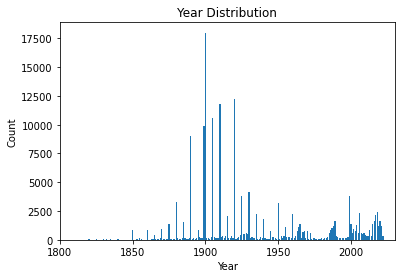

,YR_BUILT,count
0,1700.0,1
1,1710.0,1
2,1725.0,2
3,1752.0,2
4,1760.0,1
...,...,...
231,2020.0,1613
232,2021.0,1224
233,2022.0,340
234,2023.0,8


In [7]:
#Year built distribution
grouped_data = df.groupby('YR_BUILT').size().reset_index(name='count')
plt.bar(grouped_data['YR_BUILT'], grouped_data['count'])
plt.title(f'Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xlim(1800, 2030)
plt.show()
grouped_data

In [8]:
#data imputation

#sub 20198 with 2019
df["YR_BUILT"] = df["YR_BUILT"].replace(20198,2019)

#sub nan values
df["YR_BUILT"] = df["YR_BUILT"].apply(lambda x: random.randint(1850, 2024) if pd.isna(x) else x)

In [9]:
#drop rows that have nan values in zipcode
df = df[df['ZIP_CODE'].notna()]

**What communities are building more housing units?**

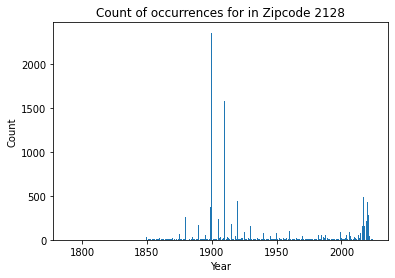

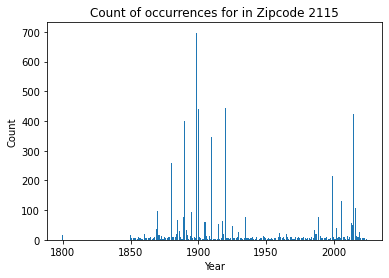

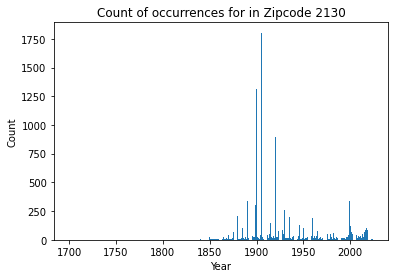

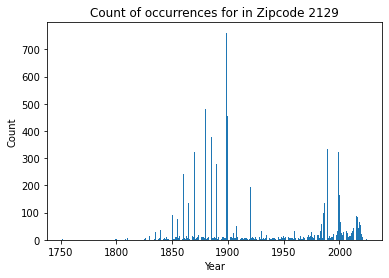

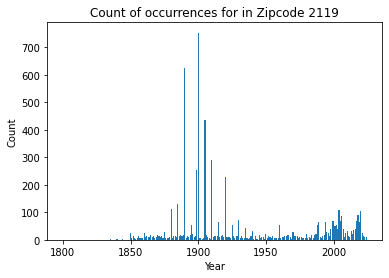

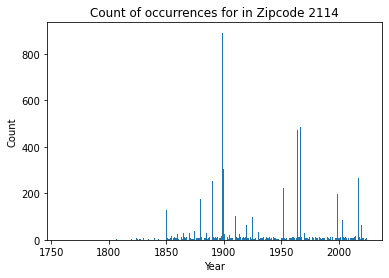

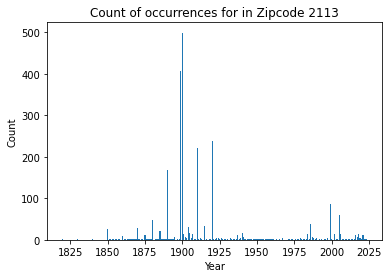

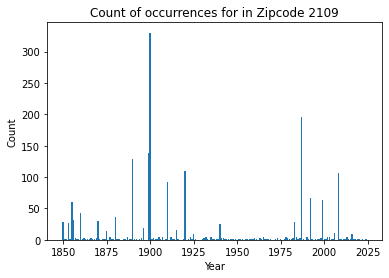

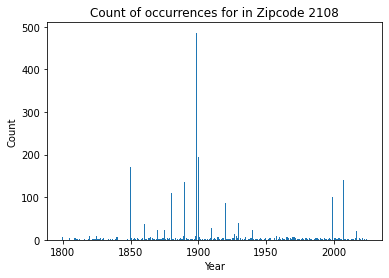

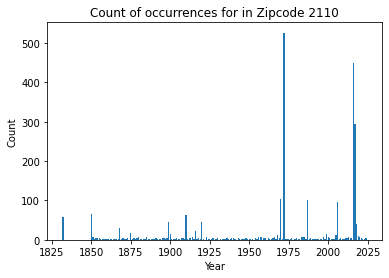

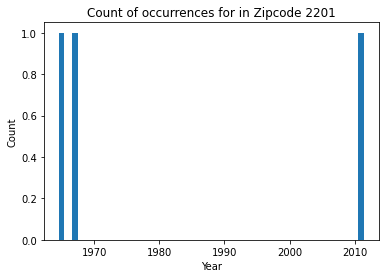

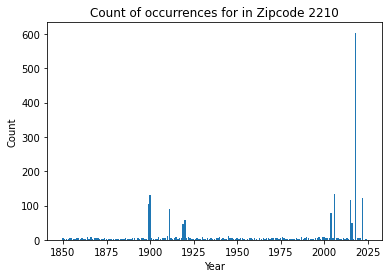

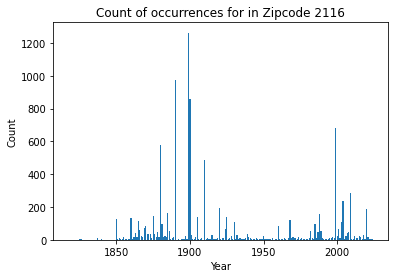

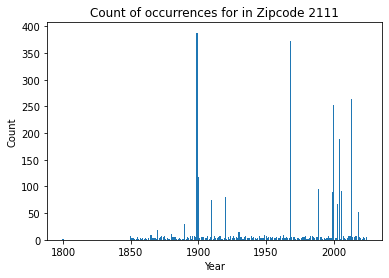

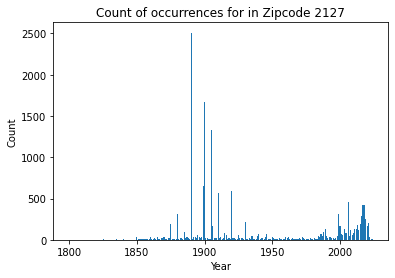

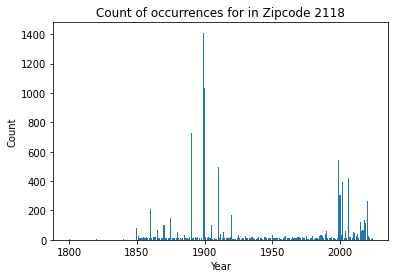

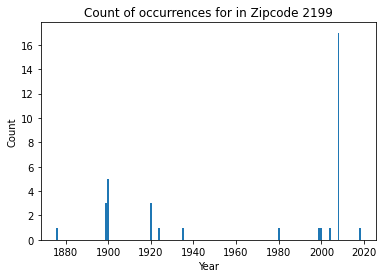

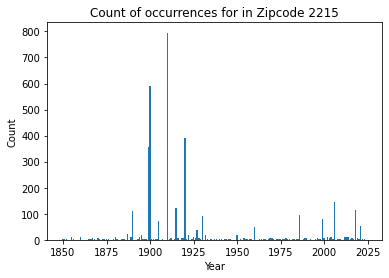

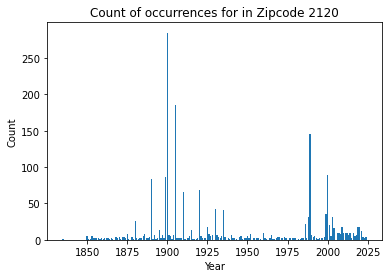

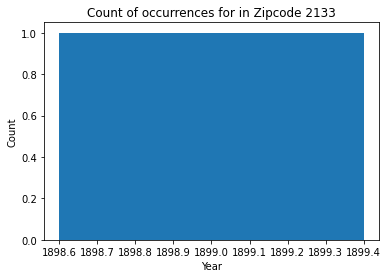

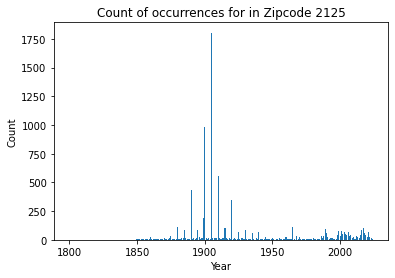

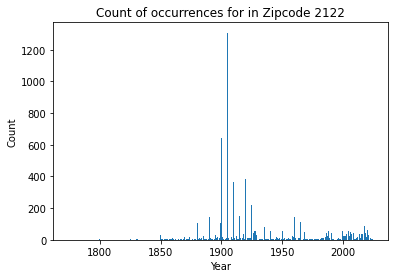

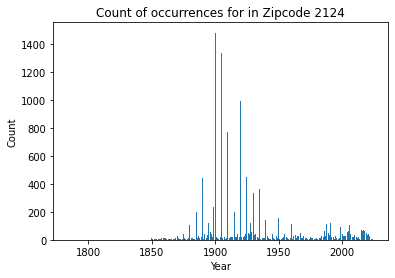

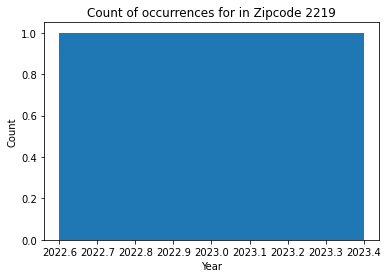

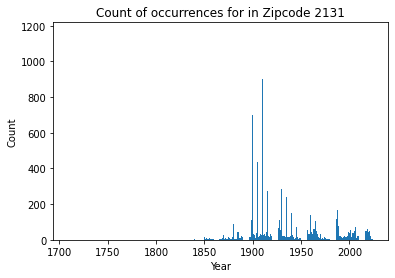

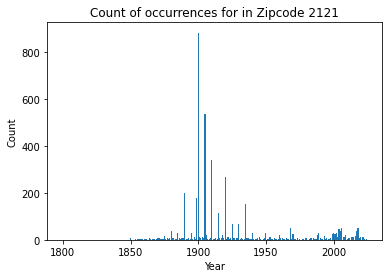

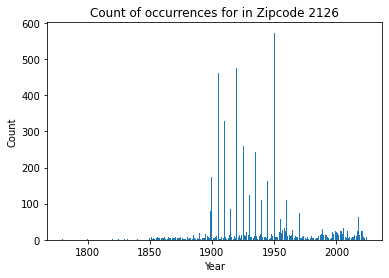

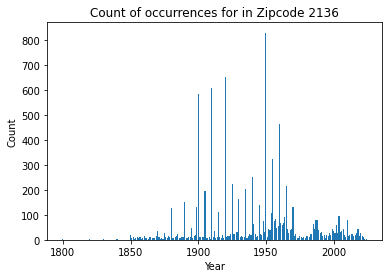

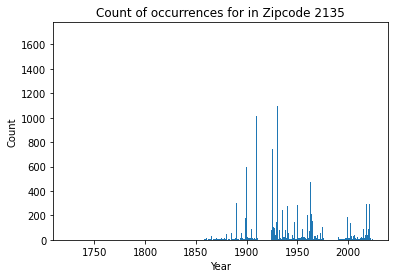

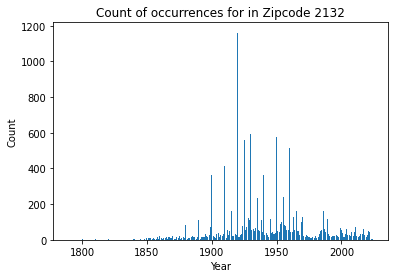

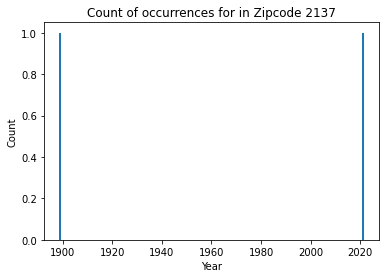

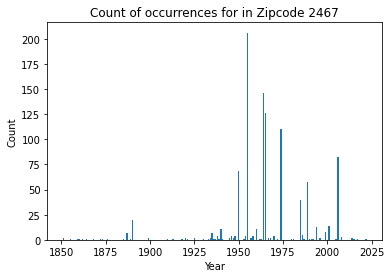

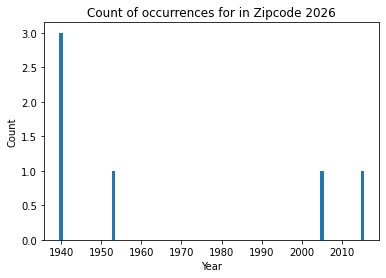

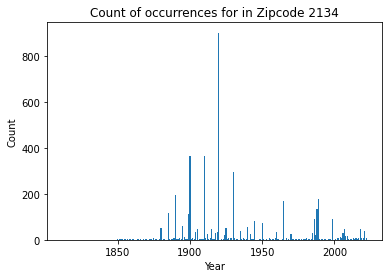

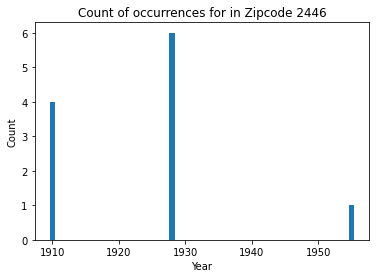

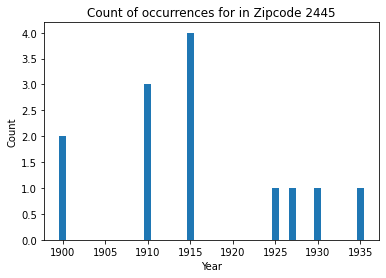

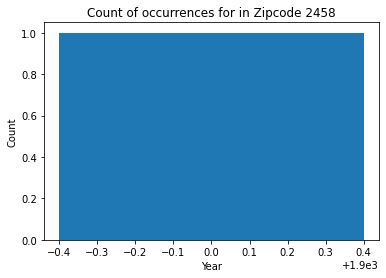

In [14]:
df["ZIP_CODE"] = df["ZIP_CODE"].astype('int')
zipcodes = df['ZIP_CODE'].unique()
unique_zipcodes = zipcodes[~np.isnan(df['ZIP_CODE'].unique())]

for zipcode in unique_zipcodes:
    # Filter data for the current year
    zipcodes = df[df['ZIP_CODE'] == zipcode]
    
    # Group by 'zipcode' and get the count for each group
    grouped_data = zipcodes.groupby('YR_BUILT').size().reset_index(name='count')

    # Plot the data for the current year
    plt.bar(grouped_data['YR_BUILT'], grouped_data['count'])
    plt.title(f'Count of occurrences for in Zipcode {int(zipcode)}')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.savefig(str(zipcode)+".png", dpi=100)
    plt.show()